### Task 1: Preprocess and Explore the Data

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Fetch historical data from YFinance

In [2]:
# Fetch historical data from YFinance
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
# Fetch data for TSLA, BND, and SPY
start_date = '2015-01-01'
end_date = '2024-10-31'
tsla_data = fetch_data('TSLA', start_date, end_date)
bnd_data = fetch_data('BND', start_date, end_date)
spy_data = fetch_data('SPY', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Data cleaning and understanding
def preprocess_data(df):
    df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    df = df.dropna()  # Handle missing values
    df['Daily Return'] = df['Adj Close'].pct_change()
    return df

tsla_data = preprocess_data(tsla_data)
bnd_data = preprocess_data(bnd_data)
spy_data = preprocess_data(spy_data)

In [5]:
# Basic statistics
print("Basic Statistics for TSLA:")
print(tsla_data.describe())

Basic Statistics for TSLA:
Price          Open         High          Low        Close    Adj Close  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.461872   113.895836   108.869421   111.438965   111.438965   
std      110.208156   112.643277   107.541830   110.120450   110.120450   
min        9.488000    10.331333     9.403333     9.578000     9.578000   
25%       17.058499    17.368167    16.790167    17.066167    17.066167   
50%       24.986667    25.279000    24.462334    25.043000    25.043000   
75%      217.264999   221.910004   212.084999   216.865002   216.865002   
max      411.470001   414.496674   405.666656   409.970001   409.970001   

Price         Volume Daily Return  
Ticker          TSLA               
count   2.474000e+03  2473.000000  
mean    1.125745e+08     0.001799  
std     7.449619e+07     0.035802  
min     1.062000e+07    -0.210628  
25%   

### Exploratory Data Analysis

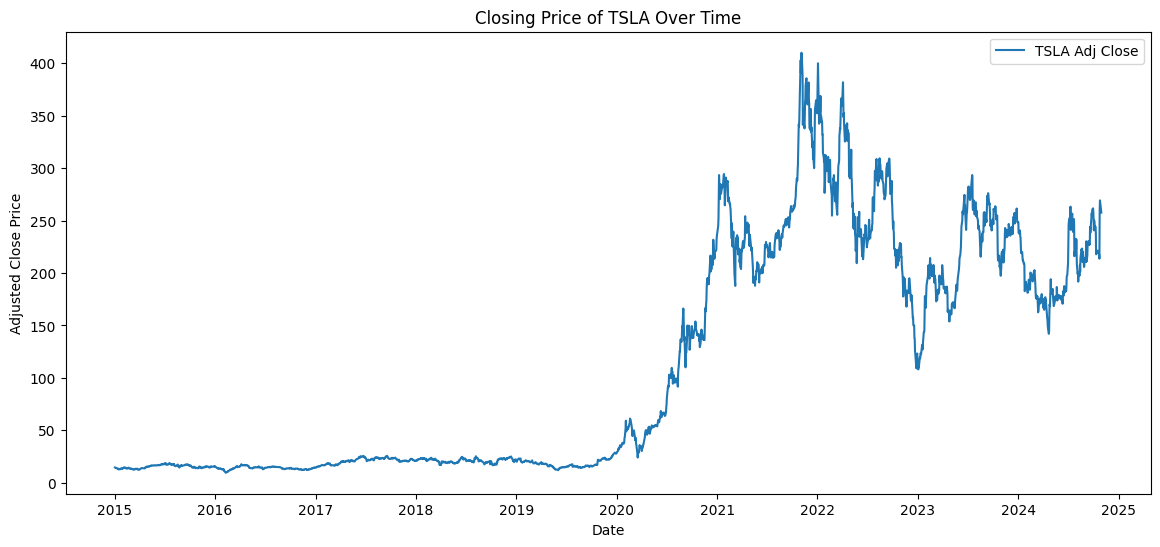

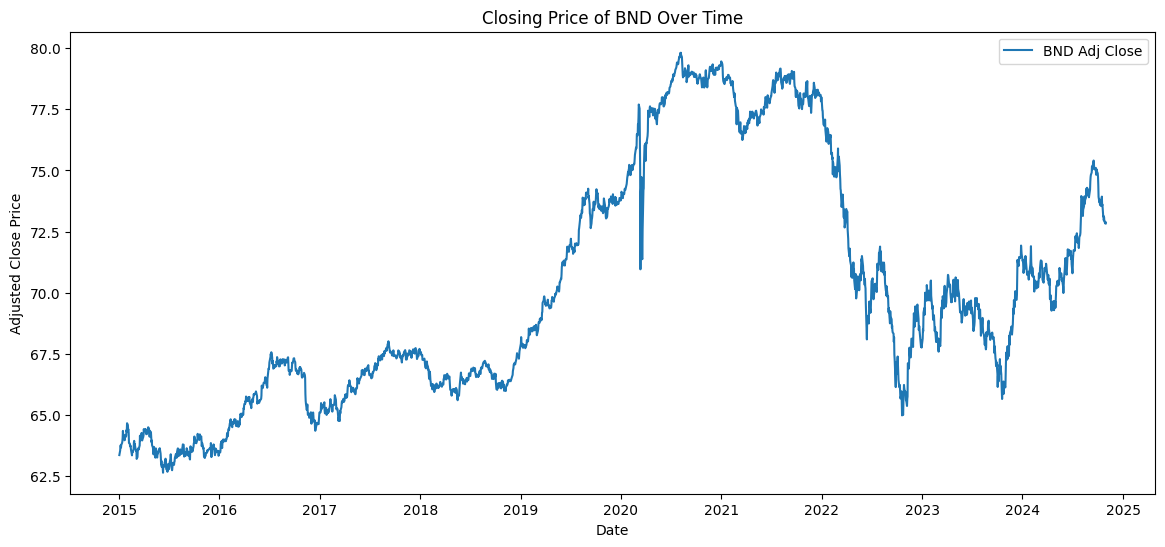

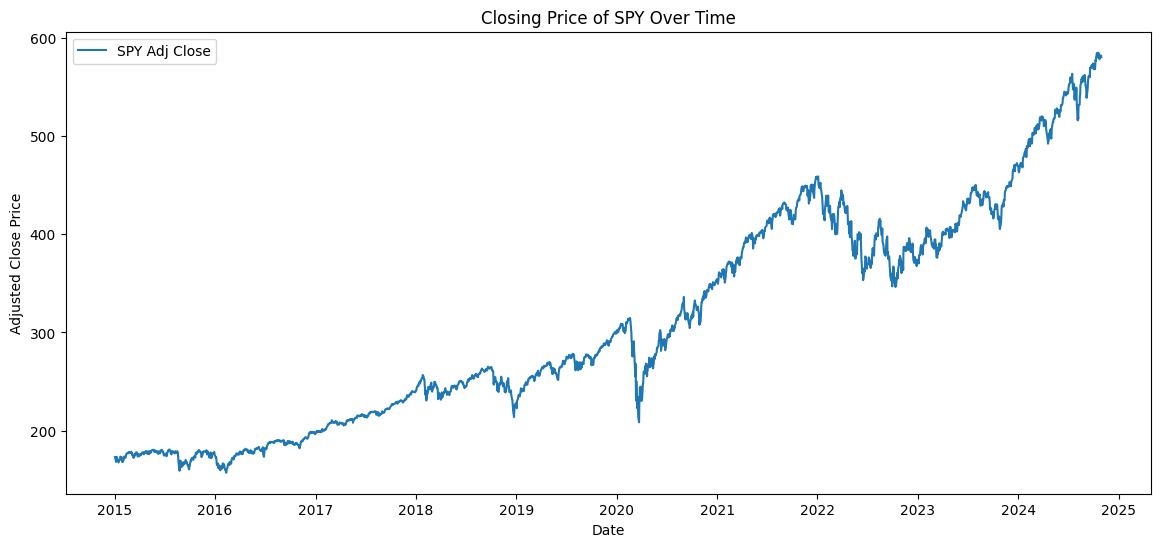

In [6]:
def plot_closing_price(df, ticker):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Adj Close'], label=f'{ticker} Adj Close')
    plt.title(f'Closing Price of {ticker} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

plot_closing_price(tsla_data, 'TSLA')
plot_closing_price(bnd_data, 'BND')
plot_closing_price(spy_data, 'SPY')

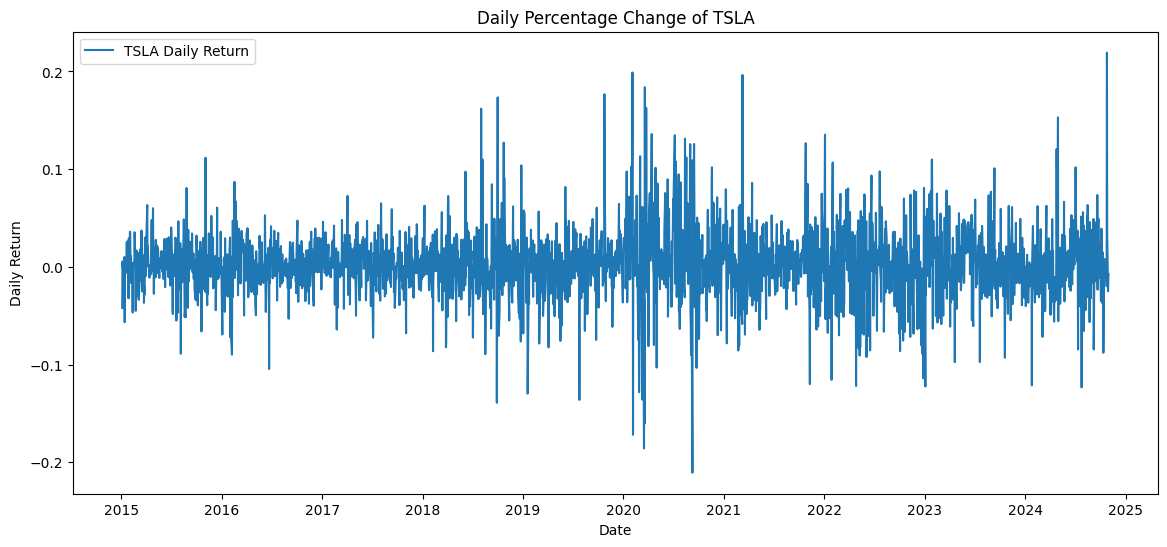

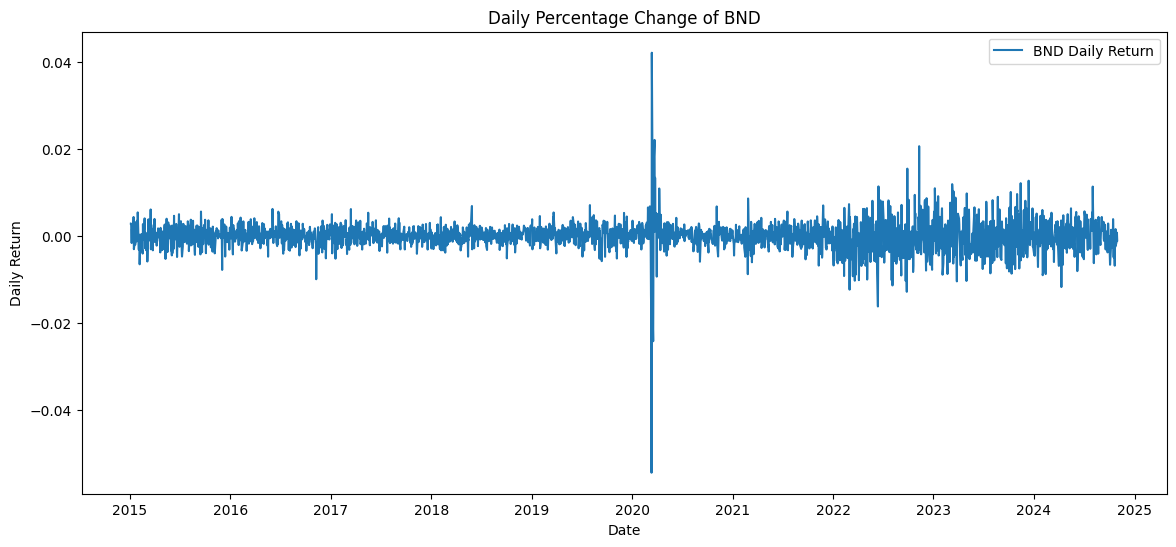

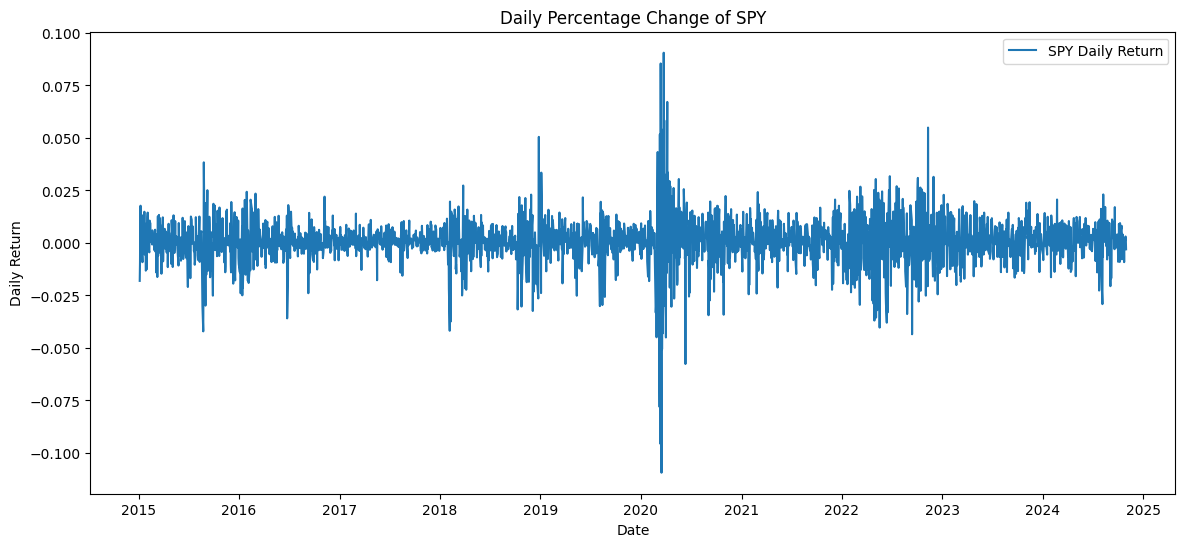

In [8]:
# Calculate and plot daily percentage change
def plot_daily_return(df, ticker):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Daily Return'], label=f'{ticker} Daily Return')
    plt.title(f'Daily Percentage Change of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.show()

plot_daily_return(tsla_data, 'TSLA')
plot_daily_return(bnd_data, 'BND')
plot_daily_return(spy_data, 'SPY')

### Analyze volatility using rolling means and standard deviations

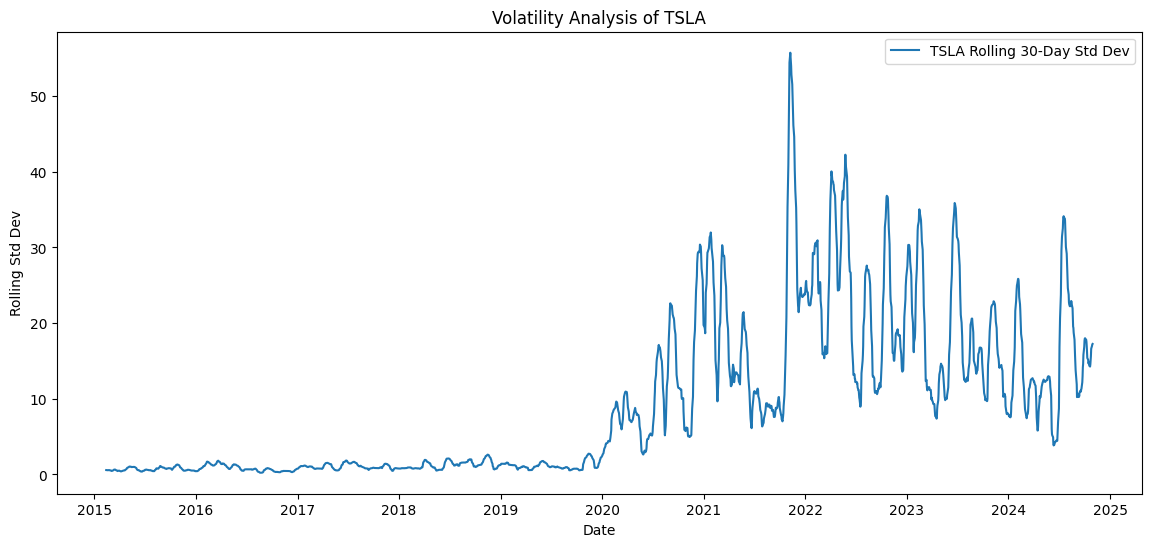

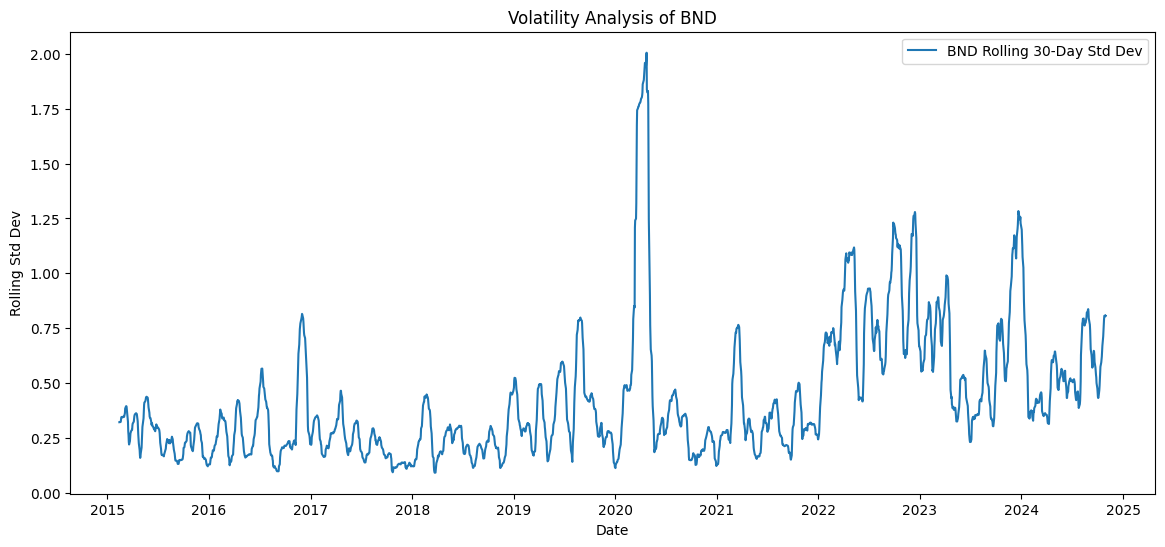

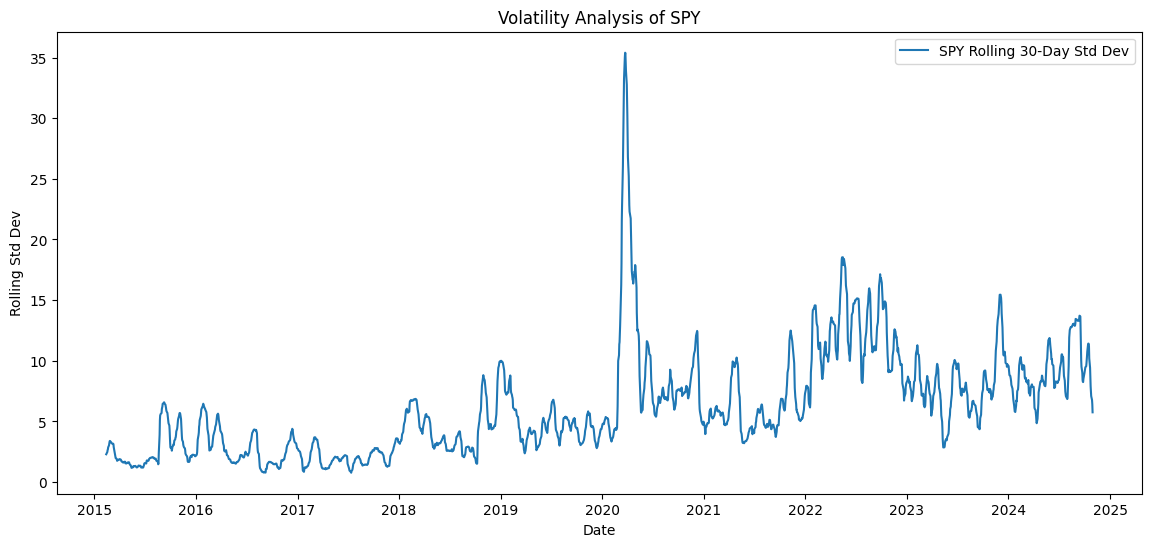

In [10]:
# Analyze volatility using rolling means and standard deviations
def plot_rolling_volatility(df, ticker, window=30):
    rolling_std = df['Adj Close'].rolling(window=window).std()
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, rolling_std, label=f'{ticker} Rolling {window}-Day Std Dev')
    plt.title(f'Volatility Analysis of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Rolling Std Dev')
    plt.legend()
    plt.show()

plot_rolling_volatility(tsla_data, 'TSLA')
plot_rolling_volatility(bnd_data, 'BND')
plot_rolling_volatility(spy_data, 'SPY')

### Decompose the time series to find trends, seasonality, and residuals

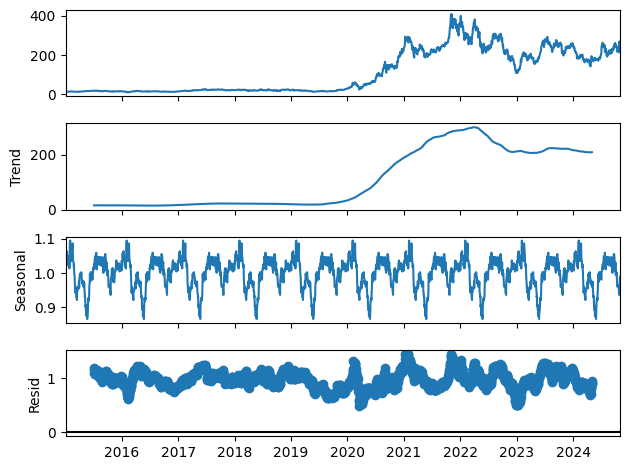

In [11]:
# Decompose the time series to find trends, seasonality, and residuals
decomposition = seasonal_decompose(tsla_data['Adj Close'], model='multiplicative', period=252)
decomposition.plot()
plt.show()

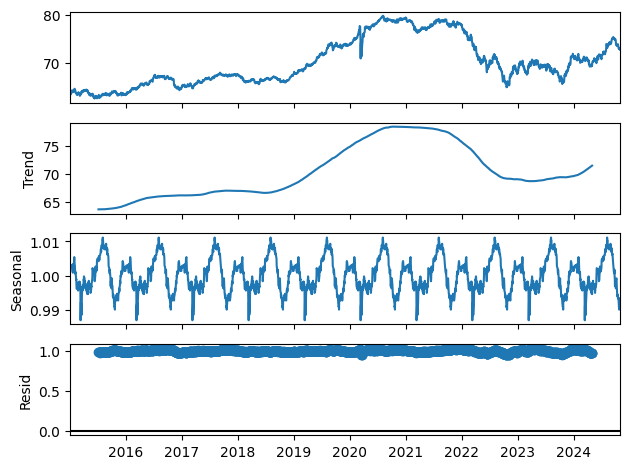

In [12]:
# Decompose the time series to find trends, seasonality, and residuals
decomposition = seasonal_decompose(bnd_data['Adj Close'], model='multiplicative', period=252)
decomposition.plot()
plt.show()

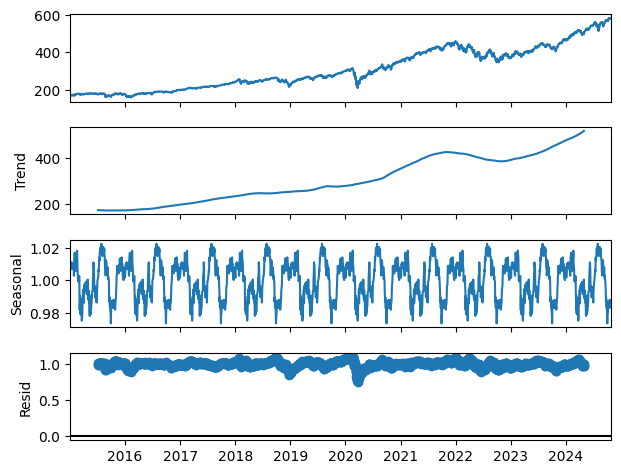

In [13]:
# Decompose the time series to find trends, seasonality, and residuals
decomposition = seasonal_decompose(spy_data['Adj Close'], model='multiplicative', period=252)
decomposition.plot()
plt.show()

### Check for stationarity using the Augmented Dickey-Fuller test

In [14]:
# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(tsla_data['Adj Close'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -1.1507672706146075
p-value: 0.694408065768529


In [15]:
# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(bnd_data['Adj Close'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -1.4746588153111553
p-value: 0.5460079517663255


In [17]:
# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(spy_data['Adj Close'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: 1.0133130764473313
p-value: 0.9944044496746401
